In [1]:
import sklearn

In [2]:
import sklearn
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [49]:
X,y = datasets.load_diabetes(return_X_y=True)
X = X[:, 2].reshape(-1, 1)
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [50]:
data= pd.DataFrame(X)
data['10'] = y

In [51]:
data.head()

,0,10
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [52]:
data.corr()

,0,10
0,1.00000,0.58645
10,0.58645,1.00000


In [38]:
X, y = make_regression(n_features=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [3]:
m = 150
#np.random.seed(42)
X = np.random.rand(m, 3) * 2
X= np.sort(X, axis= 0)
y = 4 * (X[:, 0] - 0.5) ** 2 + 6 * (X[:, 1] - 0.5)**2 + 2 * (X[:, 2] - 0.5)**5
y = y + np.random.randn(m,) / 10
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [28]:
X_train.shape

(422, 10)

In [53]:
reg1 = ldtr(max_depth= 2)
reg2 = LinearRegression(n_jobs = -1)
reg3 = LinearSVR()
reg4 = SVR(kernel = 'rbf')
reg5 = DecisionTreeRegressor(max_depth = 2, min_samples_leaf= 3, min_samples_split= 6)
reg6 = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
reg7 = RandomForestRegressor(max_depth = 2,n_jobs = -1)

In [54]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)
reg7.fit(X_train, y_train)

E:\Research_paper\scikit-learn-master\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


RandomForestRegressor(max_depth=2, n_jobs=-1)

In [55]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)
y_pred6 = reg6.predict(X_test)
y_pred7 = reg7.predict(X_test)

In [56]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred1))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred2))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred3))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred4))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred5))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred6))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred7))

Mean squared error: 2528.64
Mean squared error: 2548.07
Mean squared error: 5073.46
Mean squared error: 3252.07
Mean squared error: 2769.48
Mean squared error: 4882.90
Mean squared error: 2749.06


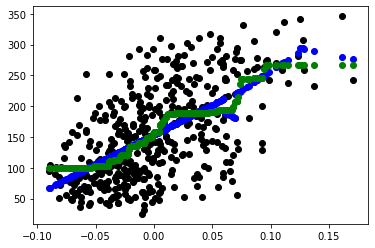

In [57]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train,  color='black')
    plt.scatter(X_train[:, i], reg1.predict(X_train),  color='blue')
    plt.scatter(X_train[:, i], reg7.predict(X_train),  color='green')
    plt.show()

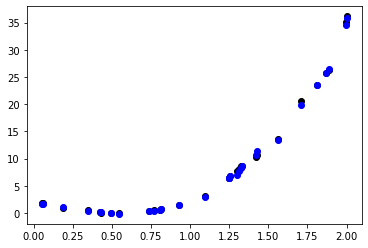

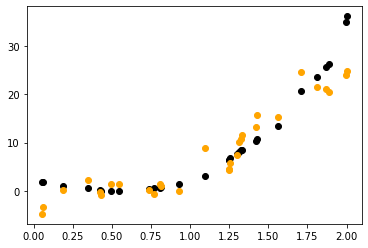

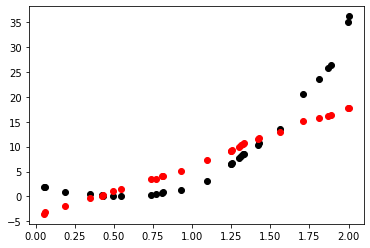

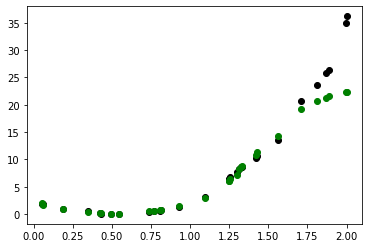

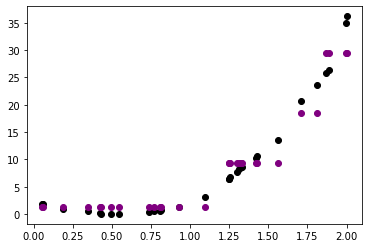

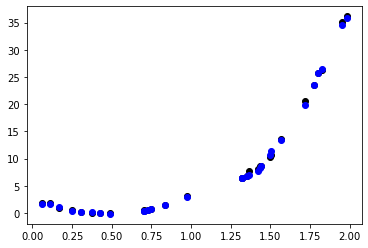

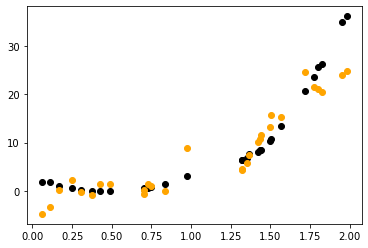

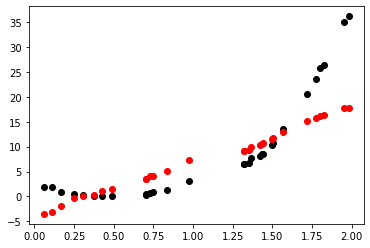

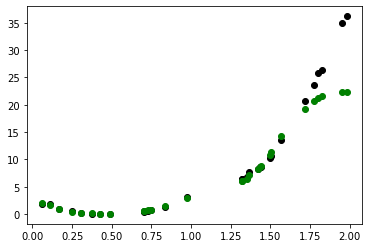

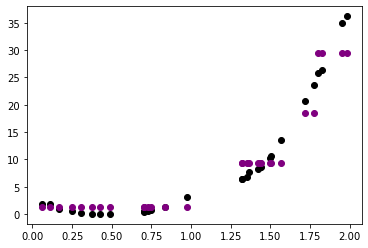

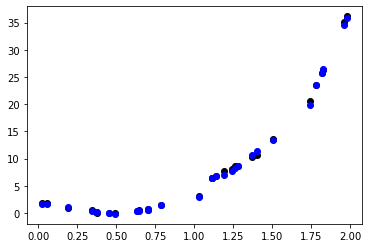

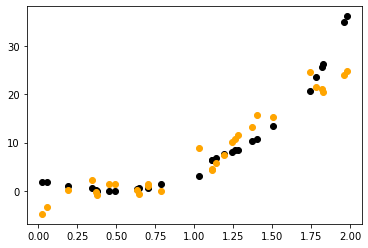

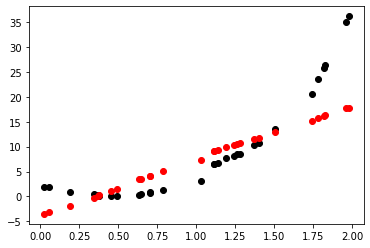

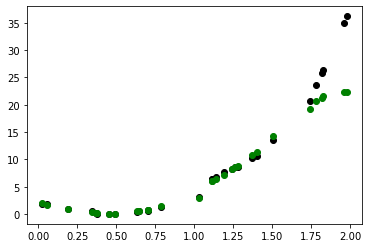

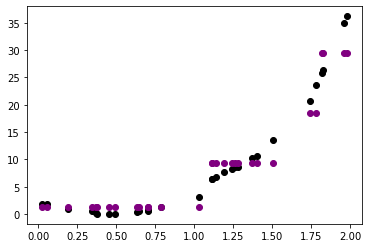

In [11]:
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred1, color='blue')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred2, color='orange')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred3, color='red')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred4, color='green')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred5, color='purple')
    plt.show()